In [175]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [176]:
train_data=pd.read_csv("train_set.csv")
test_data=pd.read_csv("test_set.csv")

In [177]:
for col in train_data.columns:
    if type(train_data[col][0])==str:
        values=set(train_data[col])
        dict_={}
        for i,val in enumerate(values):
            dict_[val]=i
        train_data[col].replace(dict_, inplace=True)
        test_data[col].replace(dict_, inplace=True)

In [178]:
train_data.head()

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,class
0,0,0,1,1,1,1,1,0,1,4,0,0,1,7,1,0,0,5,0
1,2,0,1,1,0,0,1,0,1,3,0,0,1,5,1,0,0,3,0
2,0,1,1,1,1,0,1,0,1,2,1,2,2,2,1,1,0,1,0
3,0,1,1,1,1,1,1,0,1,2,1,0,1,1,1,0,0,3,0
4,1,1,1,1,1,1,1,1,1,2,1,0,1,1,2,0,0,1,0


In [179]:
train_data = shuffle(train_data)

In [180]:
X_train = np.array(train_data.drop('class',1))
Y_train = np.array(train_data["class"])

X_test = np.array(test_data.drop('class',1))
Y_test = np.array(test_data["class"])

In [181]:
## Implementation

In [182]:
class NaiveBayes:
    def fit(self, X, y):
        self.X, self.y = X, y
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def get_likelihood(self, mean, var, x):
        eps = 1e-4 
        coeff = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def classify(self, sample):
        posterior_probs = []
        for i, c in enumerate(self.classes):
            posterior = np.mean(self.y == c)
            for feature_value, params in zip(sample, self.parameters[i]):
                likelihood = self.get_likelihood(params["mean"], params["var"], feature_value)
                posterior *= likelihood
            posterior_probs.append(posterior)
        return self.classes[np.argmax(posterior_probs)],posterior_probs[self.classes[np.argmax(posterior_probs)]]

    def predict(self, X,Y):
        y_pred = [self.classify(sample) for sample in X]
        y_pred = pd.DataFrame(y_pred, columns=['Pred', 'Probability'])
        y_pred["GT"] = Y
        return y_pred
        

In [183]:
nb=NaiveBayes()
nb.fit(np.array(X_train),np.array(Y_train))

In [187]:
test_pred = nb.predict(X_test,Y_test)

In [188]:
print("Accuracy on test data",accuracy_score(test_pred["Pred"],test_pred["GT"]))

Accuracy on test data 0.8571428571428571


### Split into 4 and check on test

In [212]:
from sklearn.utils import shuffle

def random_shuffle_dataset(train_data):
    #print("shuffling")
    train_data = shuffle(train_data)
    X_train = np.array(train_data.drop('class',1))
    Y_train = np.array(train_data["class"])
    train_ratio = int(0.25 * len(X_train))
    return X_train,Y_train

In [213]:
len(X_train)

100

In [214]:
X_train1,y_train1 = X_train[:train_ratio],Y_train[:train_ratio]
X_train2,y_train2 = X_train[train_ratio:2*train_ratio],Y_train[train_ratio:2*train_ratio]
X_train3,y_train3 = X_train[2*train_ratio:3*train_ratio],Y_train[2*train_ratio:3*train_ratio]
X_train4,y_train4 = X_train[3*train_ratio:],Y_train[3*train_ratio:]

In [215]:
accuracy_collect = []
accuracy_avg = []
for i in range(4):
    nb=NaiveBayes()
    accuracy_collect = []
    for j in range(4):
        X_train,Y_train = random_shuffle_dataset(train_data)
        nb.fit(eval("X_train"+str(i+1)),eval("y_train"+str(i+1)))
        test_pred = nb.predict(X_test,Y_test)
        accuracy_collect.append(accuracy_score(test_pred["Pred"],test_pred["GT"]))
    accuracy_avg.append(sum(accuracy_collect)/4)


In [216]:
accuracy_avg

[0.6666666666666666,
 0.8095238095238095,
 0.7857142857142857,
 0.7142857142857143]

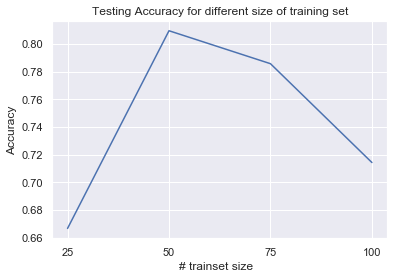

In [217]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], accuracy_avg)
plt.xlabel('# trainset size  ')
plt.xticks([1,2,3,4],(25,50,75,100))
plt.ylabel('Accuracy')
plt.title('Testing Accuracy for different size of training set')
plt.show()

## Sklrearn fn

In [218]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
test_preds= gnb.predict(X_test)

In [219]:
print("Accuracy on test data",accuracy_score(test_preds,Y_test,normalize = True))

Accuracy on test data 0.8571428571428571
